# Base de dados de Compartilhamento de bicicletas em Seattle - USA

### Dicionário dos dados: 



    ***Station dataset***

        station_id: station ID number

        name: name of station

        lat: station latitude

        long: station longitude

        install_date: date that station was placed in service

        install_dockcount: number of docks at each station on the installation date

        modification_date: date that station was modified, resulting in a change in location or dock count

        current_dockcount: number of docks at each station on 8/31/2016

        decommission_date: date that station was placed out of service
 
 

    Trip dataset

        trip_id: numeric ID of bike trip taken

        starttime: day and time trip started, in PST

        stoptime: day and time trip ended, in PST

        bikeid: ID attached to each bike

        tripduration: time of trip in seconds

        from_station_name: name of station where trip originated

        to_station_name: name of station where trip terminated

        from_station_id: ID of station where trip originated

        to_station_id: ID of station where trip terminated

        usertype: "Short-Term Pass Holder" is a rider who purchased a 24-Hour or 3-Day Pass; "Member" is a rider who purchased a Monthly or an Annual Membership

        gender: gender of rider

        birthyear: birth year of rider



Weather dataset contains daily weather information in the service area


In [1]:
# Importando as bibliotecas

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from dateutil.parser import parse # Helps to format strins into date

%matplotlib inline

In [2]:
# importando o dataset de viagens

trip = pd.read_csv('trip.csv', error_bad_lines=False)

#importando o dataset de estações

station = pd.read_csv('station.csv',error_bad_lines=False)

# Importando o dataset de clima

weather = pd.read_csv('weather.csv',error_bad_lines=False)

b'Skipping line 50794: expected 12 fields, saw 20\n'


In [3]:
trip.head(10)

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
0,431,10/13/2014 10:31,10/13/2014 10:48,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1960.0
1,432,10/13/2014 10:32,10/13/2014 10:48,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1970.0
2,433,10/13/2014 10:33,10/13/2014 10:48,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1988.0
3,434,10/13/2014 10:34,10/13/2014 10:48,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1977.0
4,435,10/13/2014 10:34,10/13/2014 10:49,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1971.0
5,436,10/13/2014 10:34,10/13/2014 10:47,SEA00337,808.805,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1974.0
6,437,10/13/2014 11:35,10/13/2014 11:45,SEA00202,596.715,Occidental Park / Occidental Ave S & S Washing...,King Street Station Plaza / 2nd Ave Extension ...,PS-04,PS-05,Member,Male,1978.0
7,438,10/13/2014 11:35,10/13/2014 11:45,SEA00311,592.131,Occidental Park / Occidental Ave S & S Washing...,King Street Station Plaza / 2nd Ave Extension ...,PS-04,PS-05,Member,Male,1983.0
8,439,10/13/2014 11:35,10/13/2014 11:45,SEA00486,586.347,Occidental Park / Occidental Ave S & S Washing...,King Street Station Plaza / 2nd Ave Extension ...,PS-04,PS-05,Member,Female,1974.0
9,440,10/13/2014 11:35,10/13/2014 11:45,SEA00434,587.634,Occidental Park / Occidental Ave S & S Washing...,King Street Station Plaza / 2nd Ave Extension ...,PS-04,PS-05,Member,Male,1958.0


In [4]:
trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286857 entries, 0 to 286856
Data columns (total 12 columns):
trip_id              286857 non-null int64
starttime            286857 non-null object
stoptime             286857 non-null object
bikeid               286857 non-null object
tripduration         286857 non-null float64
from_station_name    286857 non-null object
to_station_name      286857 non-null object
from_station_id      286857 non-null object
to_station_id        286857 non-null object
usertype             286857 non-null object
gender               181557 non-null object
birthyear            181553 non-null float64
dtypes: float64(2), int64(1), object(9)
memory usage: 26.3+ MB


In [5]:
station.head()

,station_id,name,lat,long,install_date,install_dockcount,modification_date,current_dockcount,decommission_date
0,BT-01,3rd Ave & Broad St,47.618418,-122.350964,10/13/2014,18,NaN,18,NaN
1,BT-03,2nd Ave & Vine St,47.615829,-122.348564,10/13/2014,16,NaN,16,NaN
2,BT-04,6th Ave & Blanchard St,47.616094,-122.341102,10/13/2014,16,NaN,16,NaN
3,BT-05,2nd Ave & Blanchard St,47.613110,-122.344208,10/13/2014,14,NaN,14,NaN
4,CBD-03,7th Ave & Union St,47.610731,-122.332447,10/13/2014,20,NaN,20,NaN


In [6]:
station.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 9 columns):
station_id           58 non-null object
name                 58 non-null object
lat                  58 non-null float64
long                 58 non-null float64
install_date         58 non-null object
install_dockcount    58 non-null int64
modification_date    17 non-null object
current_dockcount    58 non-null int64
decommission_date    4 non-null object
dtypes: float64(2), int64(2), object(5)
memory usage: 4.2+ KB


In [7]:
weather.head()

,Date,Max_Temperature_F,Mean_Temperature_F,Min_TemperatureF,Max_Dew_Point_F,MeanDew_Point_F,Min_Dewpoint_F,Max_Humidity,Mean_Humidity,Min_Humidity,...,Mean_Sea_Level_Pressure_In,Min_Sea_Level_Pressure_In,Max_Visibility_Miles,Mean_Visibility_Miles,Min_Visibility_Miles,Max_Wind_Speed_MPH,Mean_Wind_Speed_MPH,Max_Gust_Speed_MPH,Precipitation_In,Events
0,10/13/2014,71,62.0,54,55,51,46,87,68,46,...,29.79,29.65,10,10,4,13,4,21,0.00,Rain
1,10/14/2014,63,59.0,55,52,51,50,88,78,63,...,29.75,29.54,10,9,3,10,5,17,0.11,Rain
2,10/15/2014,62,58.0,54,53,50,46,87,77,67,...,29.71,29.51,10,9,3,18,7,25,0.45,Rain
3,10/16/2014,71,61.0,52,49,46,42,83,61,36,...,29.95,29.81,10,10,10,9,4,-,0.00,Rain
4,10/17/2014,64,60.0,57,55,51,41,87,72,46,...,29.78,29.73,10,10,6,8,3,-,0.14,Rain


In [8]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 21 columns):
Date                          689 non-null object
Max_Temperature_F             689 non-null int64
Mean_Temperature_F            688 non-null float64
Min_TemperatureF              689 non-null int64
Max_Dew_Point_F               689 non-null int64
MeanDew_Point_F               689 non-null int64
Min_Dewpoint_F                689 non-null int64
Max_Humidity                  689 non-null int64
Mean_Humidity                 689 non-null int64
Min_Humidity                  689 non-null int64
Max_Sea_Level_Pressure_In     689 non-null float64
Mean_Sea_Level_Pressure_In    689 non-null float64
Min_Sea_Level_Pressure_In     689 non-null float64
Max_Visibility_Miles          689 non-null int64
Mean_Visibility_Miles         689 non-null int64
Min_Visibility_Miles          689 non-null int64
Max_Wind_Speed_MPH            689 non-null int64
Mean_Wind_Speed_MPH           689 non-null int64
Max_

Lets explore this datasets. I will star with the trips dataset, but before i start the exploration, there are some things i should do first:

* Transform the time columns in time series (I chalenging myself, thats the first time i do this)
* Join the lat e long in the trip dataset, this way i can do some geoanalysis

# Data Manipulation on Trips Dataset

In [9]:
trip.columns

Index(['trip_id', 'starttime', 'stoptime', 'bikeid', 'tripduration',
       'from_station_name', 'to_station_name', 'from_station_id',
       'to_station_id', 'usertype', 'gender', 'birthyear'],
      dtype='object')

In [10]:
# lests drop the id columns

trip.drop(['trip_id','bikeid','from_station_id', 'to_station_id'], axis = 1,   inplace = True)

In [11]:
trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286857 entries, 0 to 286856
Data columns (total 8 columns):
starttime            286857 non-null object
stoptime             286857 non-null object
tripduration         286857 non-null float64
from_station_name    286857 non-null object
to_station_name      286857 non-null object
usertype             286857 non-null object
gender               181557 non-null object
birthyear            181553 non-null float64
dtypes: float64(2), object(6)
memory usage: 17.5+ MB


In [12]:
data = trip['starttime']

In [13]:
dta = list(trip['starttime']) # transforma cada elemento da coluna startime em uma string
dta = pd.to_datetime(dta)  # Nor formato de string, cada elemento da lista é tranformado em data pelo pandas

trip['starttime'] = dta # Salvando as alterações na coluna

In [14]:
# Confirmando se deu certo
trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286857 entries, 0 to 286856
Data columns (total 8 columns):
starttime            286857 non-null datetime64[ns]
stoptime             286857 non-null object
tripduration         286857 non-null float64
from_station_name    286857 non-null object
to_station_name      286857 non-null object
usertype             286857 non-null object
gender               181557 non-null object
birthyear            181553 non-null float64
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 17.5+ MB


In [15]:
trip.starttime

0        2014-10-13 10:31:00
1        2014-10-13 10:32:00
2        2014-10-13 10:33:00
3        2014-10-13 10:34:00
4        2014-10-13 10:34:00
5        2014-10-13 10:34:00
6        2014-10-13 11:35:00
7        2014-10-13 11:35:00
8        2014-10-13 11:35:00
9        2014-10-13 11:35:00
10       2014-10-13 11:36:00
11       2014-10-13 11:37:00
12       2014-10-13 11:37:00
13       2014-10-13 11:37:00
14       2014-10-13 11:37:00
15       2014-10-13 11:37:00
16       2014-10-13 11:37:00
17       2014-10-13 11:37:00
18       2014-10-13 11:40:00
19       2014-10-13 11:41:00
20       2014-10-13 11:41:00
21       2014-10-13 11:41:00
22       2014-10-13 11:42:00
23       2014-10-13 11:43:00
24       2014-10-13 11:43:00
25       2014-10-13 11:43:00
26       2014-10-13 11:43:00
27       2014-10-13 11:43:00
28       2014-10-13 11:43:00
29       2014-10-13 11:44:00
                 ...        
286827   2016-08-31 20:13:00
286828   2016-08-31 20:32:00
286829   2016-08-31 20:32:00
286830   2016-

In [16]:
trip.head()

,starttime,stoptime,tripduration,from_station_name,to_station_name,usertype,gender,birthyear
0,2014-10-13 10:31:00,10/13/2014 10:48,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,Member,Male,1960.0
1,2014-10-13 10:32:00,10/13/2014 10:48,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,Member,Male,1970.0
2,2014-10-13 10:33:00,10/13/2014 10:48,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,Member,Female,1988.0
3,2014-10-13 10:34:00,10/13/2014 10:48,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,Member,Female,1977.0
4,2014-10-13 10:34:00,10/13/2014 10:49,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,Member,Male,1971.0


In [17]:
# Vamos fazer o mesmo com a coluna stoptime

dtb = list(trip['stoptime']) # transforma cada elemento da coluna stoptime em uma string
dtb = pd.to_datetime(dtb)  # Nor formato de string, cada elemento da lista é tranformado em data pelo pandas

trip['stoptime'] = dtb # Salvando as alterações na coluna


In [18]:
trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286857 entries, 0 to 286856
Data columns (total 8 columns):
starttime            286857 non-null datetime64[ns]
stoptime             286857 non-null datetime64[ns]
tripduration         286857 non-null float64
from_station_name    286857 non-null object
to_station_name      286857 non-null object
usertype             286857 non-null object
gender               181557 non-null object
birthyear            181553 non-null float64
dtypes: datetime64[ns](2), float64(2), object(4)
memory usage: 17.5+ MB


In [19]:
trip.stoptime[:6]

0   2014-10-13 10:48:00
1   2014-10-13 10:48:00
2   2014-10-13 10:48:00
3   2014-10-13 10:48:00
4   2014-10-13 10:49:00
5   2014-10-13 10:47:00
Name: stoptime, dtype: datetime64[ns]

Now should be a good ideia estimate the age of the users, as we have the birthyear

In [20]:
trip.isnull().sum()

starttime                 0
stoptime                  0
tripduration              0
from_station_name         0
to_station_name           0
usertype                  0
gender               105300
birthyear            105304
dtype: int64

In [21]:
trip.birthyear.describe()

count    181553.000000
mean       1979.759062
std          10.167119
min        1931.000000
25%        1974.000000
50%        1983.000000
75%        1987.000000
max        1999.000000
Name: birthyear, dtype: float64

In [22]:
# Preenchendo os valores ausentes com valores entre 1969 e 1989

trip.birthyear.fillna(value = np.random.randint(1969,1989), inplace=True)
    

In [23]:
trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286857 entries, 0 to 286856
Data columns (total 8 columns):
starttime            286857 non-null datetime64[ns]
stoptime             286857 non-null datetime64[ns]
tripduration         286857 non-null float64
from_station_name    286857 non-null object
to_station_name      286857 non-null object
usertype             286857 non-null object
gender               181557 non-null object
birthyear            286857 non-null float64
dtypes: datetime64[ns](2), float64(2), object(4)
memory usage: 17.5+ MB


In [24]:
trip.birthyear.describe()

count    286857.000000
mean       1978.012030
std           8.407467
min        1931.000000
25%        1975.000000
50%        1975.000000
75%        1985.000000
max        1999.000000
Name: birthyear, dtype: float64

In [48]:
# tranformei o ano de nascimento em uma lista de inteiros

yr = trip.birthyear.astype('int64')

In [49]:
yr = list(yr)

In [50]:
type(yr)

list

In [51]:
yr

[1960,
 1970,
 1988,
 1977,
 1971,
 1974,
 1978,
 1983,
 1974,
 1958,
 1983,
 1982,
 1984,
 1955,
 1953,
 1958,
 1959,
 1950,
 1976,
 1986,
 1953,
 1986,
 1967,
 1986,
 1987,
 1987,
 1974,
 1967,
 1983,
 1970,
 1969,
 1986,
 1960,
 1973,
 1989,
 1946,
 1983,
 1970,
 1987,
 1959,
 1971,
 1956,
 1983,
 1951,
 1981,
 1953,
 1982,
 1983,
 1988,
 1950,
 1979,
 1988,
 1960,
 1984,
 1972,
 1990,
 1981,
 1982,
 1967,
 1968,
 1955,
 1972,
 1950,
 1946,
 1953,
 1950,
 1989,
 1964,
 1988,
 1975,
 1960,
 1970,
 1983,
 1989,
 1952,
 1981,
 1975,
 1967,
 1975,
 1949,
 1991,
 1982,
 1978,
 1950,
 1946,
 1949,
 1953,
 1950,
 1975,
 1975,
 1985,
 1975,
 1975,
 1981,
 1978,
 1975,
 1987,
 1963,
 1976,
 1975,
 1946,
 1977,
 1975,
 1981,
 1958,
 1976,
 1973,
 1978,
 1987,
 1975,
 1990,
 1982,
 1946,
 1987,
 1975,
 1979,
 1974,
 1975,
 1946,
 1949,
 1946,
 1989,
 1991,
 1951,
 1979,
 1975,
 1975,
 1975,
 1974,
 1978,
 1958,
 1972,
 1968,
 1975,
 1946,
 1975,
 1967,
 1980,
 1981,
 1956,
 1951,
 1975,
 1975,

In [82]:
def ano(yr):
    '''Essa função pega cada valor dentro da lista yr
    usa como o ano para criar um datetime e retorna a lista dt, contendo as informações'''
    dt = []
    for i in yr:
        x = datetime(yr[i],1,1)
        dt.append(x)

    return dt
    

In [83]:
# Agora transformamos a saída da função em uma lista de datetime
dt = ano(yr)
dt = pd.to_datetime(dt)
dt = pd.Series(dt)
dt

In [139]:
from datetime import timedelta

In [140]:
delta = trip.stoptime - dt

In [153]:
delta = pd.to_timedelta(delta)
delta

0        18548 days 10:48:00
1        10512 days 10:48:00
2        17452 days 10:48:00
3        14165 days 10:48:00
4         8686 days 10:49:00
5        14530 days 10:47:00
6        14530 days 11:45:00
7        11243 days 11:45:00
8        14530 days 11:45:00
9        22565 days 11:45:00
10       11243 days 11:45:00
11       14530 days 11:47:00
12       14530 days 11:47:00
13        8686 days 11:47:00
14       14530 days 11:47:00
15       22565 days 11:47:00
16       14530 days 11:47:00
17       14530 days 11:47:00
18       14530 days 11:49:00
19       10512 days 11:51:00
20       14530 days 11:51:00
21       10512 days 11:51:00
22       11973 days 11:49:00
23       10512 days 11:51:00
24       12704 days 11:51:00
25       12704 days 11:52:00
26       14530 days 11:51:00
27       11973 days 11:51:00
28       11243 days 11:51:00
29       10512 days 11:55:00
                 ...        
286827   15218 days 20:34:00
286828   15218 days 20:56:00
286829   15218 days 20:56:00
286830   15218

In [142]:
def definir_idade(delta):
    '''Essa função, quebra cada elemento da variável delta, em uma string
    depois, extrai o primeiro elemento da string resultante(dias entre a data de stoptime e o ano de nascimento)
    ,transforma em número, divide por 365 e retorna uma array com as idades'''
    ID = []
    for i in delta.index:
        a = str(delta[i])
        b = a.split()
        c = b[0]
        d = pd.to_numeric(c, errors='coerce')
        idade = d/365
        ID.append(idade.astype(int))
    return pd.to_numeric(ID)

In [143]:
 idade = definir_idade(delta)

In [144]:
idade[:5]

array([50, 28, 47, 38, 23], dtype=int64)

In [136]:
# incluindo a coluna idade no dataset
trip['idade'] = idade

In [148]:
trip.idade.describe().round()

count    286857.0
mean         39.0
std           5.0
min          22.0
25%          39.0
50%          40.0
75%          41.0
max          69.0
Name: idade, dtype: float64

In [145]:
trip.columns

Index(['starttime', 'stoptime', 'tripduration', 'from_station_name',
       'to_station_name', 'usertype', 'gender', 'birthyear', 'idade'],
      dtype='object')

In [146]:
trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286857 entries, 0 to 286856
Data columns (total 9 columns):
starttime            286857 non-null datetime64[ns]
stoptime             286857 non-null datetime64[ns]
tripduration         286857 non-null float64
from_station_name    286857 non-null object
to_station_name      286857 non-null object
usertype             286857 non-null object
gender               181557 non-null object
birthyear            286857 non-null float64
idade                286857 non-null int64
dtypes: datetime64[ns](2), float64(2), int64(1), object(4)
memory usage: 19.7+ MB


### Perfeito agora temos a variável idade para estudar em nosso dataset !

In [156]:
trip.head(500)

,starttime,stoptime,tripduration,from_station_name,to_station_name,usertype,gender,birthyear,idade
0,2014-10-13 10:31:00,2014-10-13 10:48:00,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,Member,Male,1960.0,50
1,2014-10-13 10:32:00,2014-10-13 10:48:00,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,Member,Male,1970.0,28
2,2014-10-13 10:33:00,2014-10-13 10:48:00,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,Member,Female,1988.0,47
3,2014-10-13 10:34:00,2014-10-13 10:48:00,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,Member,Female,1977.0,38
4,2014-10-13 10:34:00,2014-10-13 10:49:00,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,Member,Male,1971.0,23
5,2014-10-13 10:34:00,2014-10-13 10:47:00,808.805,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,Member,Male,1974.0,39
6,2014-10-13 11:35:00,2014-10-13 11:45:00,596.715,Occidental Park / Occidental Ave S & S Washing...,King Street Station Plaza / 2nd Ave Extension ...,Member,Male,1978.0,39
7,2014-10-13 11:35:00,2014-10-13 11:45:00,592.131,Occidental Park / Occidental Ave S & S Washing...,King Street Station Plaza / 2nd Ave Extension ...,Member,Male,1983.0,30
8,2014-10-13 11:35:00,2014-10-13 11:45:00,586.347,Occidental Park / Occidental Ave S & S Washing...,King Street Station Plaza / 2nd Ave Extension ...,Member,Female,1974.0,39
9,2014-10-13 11:35:00,2014-10-13 11:45:00,587.634,Occidental Park / Occidental Ave S & S Washing...,King Street Station Plaza / 2nd Ave Extension ...,Member,Male,1958.0,61


In [152]:
2014-1970


44

(array([ 34233., 174446.,  76364.,    678.,   1136.]),
 array([22. , 31.4, 40.8, 50.2, 59.6, 69. ]),
 <a list of 5 Patch objects>)

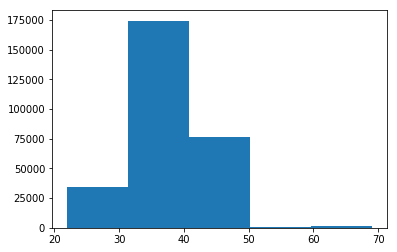

In [178]:
plt.hist(trip.idade, bins=5)

In [184]:
a = str(trip.stoptime[1])
a

'2014-10-13 10:48:00'

In [183]:
b = a.split()[0]
b

'2014-10-13'

In [181]:
b = b.split('-')

In [182]:
pd.to_numeric(b[0])

2014

In [202]:
ano = trip.stoptime
type(ano)

pandas.core.series.Series

In [199]:
p = str(ano[1])
p = p.split('-')[0]
p = pd.to_numeric(p)
p

2014

In [203]:
def idade2(ano):
    idade = []
    for i in ano.index:
        a = str(ano[i])
        b = a.split('-')[0]
        c = pd.to_numeric(b)
        

        idade.append(c.astype(int))
    return idade
        

In [205]:
idad = idade2(ano)

In [213]:
idad = pd.Series(idad)

In [217]:
idad[1] - trip.birthyear[1] 

44.0

In [218]:
idade = idad - trip.birthyear

In [219]:
idade[:5]

0    54.0
1    44.0
2    26.0
3    37.0
4    43.0
dtype: float64

In [221]:
trip['idade'] = idade

In [222]:
trip.head()

,starttime,stoptime,tripduration,from_station_name,to_station_name,usertype,gender,birthyear,idade
0,2014-10-13 10:31:00,2014-10-13 10:48:00,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,Member,Male,1960.0,54.0
1,2014-10-13 10:32:00,2014-10-13 10:48:00,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,Member,Male,1970.0,44.0
2,2014-10-13 10:33:00,2014-10-13 10:48:00,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,Member,Female,1988.0,26.0
3,2014-10-13 10:34:00,2014-10-13 10:48:00,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,Member,Female,1977.0,37.0
4,2014-10-13 10:34:00,2014-10-13 10:49:00,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,Member,Male,1971.0,43.0


(array([4.47900e+03, 5.88350e+04, 5.65470e+04, 1.29783e+05, 1.82310e+04,
        1.20260e+04, 4.18800e+03, 2.71000e+03, 5.10000e+01, 7.00000e+00]),
 array([16. , 22.9, 29.8, 36.7, 43.6, 50.5, 57.4, 64.3, 71.2, 78.1, 85. ]),
 <a list of 10 Patch objects>)

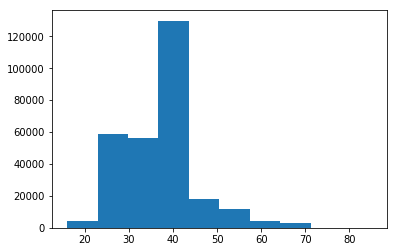

In [223]:
plt.hist(trip.idade)